In [2]:
import numpy as np
from matplotlib import pyplot as plt

def todB(num):
    return 10 * np.log10(num)

def toLinear(num):
    return 10**(num/10)

In [3]:
power_transmit = 10e-3
bandwidth = 40e6
#noise = 1.38e-23 * 290 * bandwidth
noise = 1 #no SNR

def path_loss(r):
    return toLinear(43 + 26*np.log10(r))
def path_loss2(r):
    return 43 + 26*np.log10(r)

120000000.0


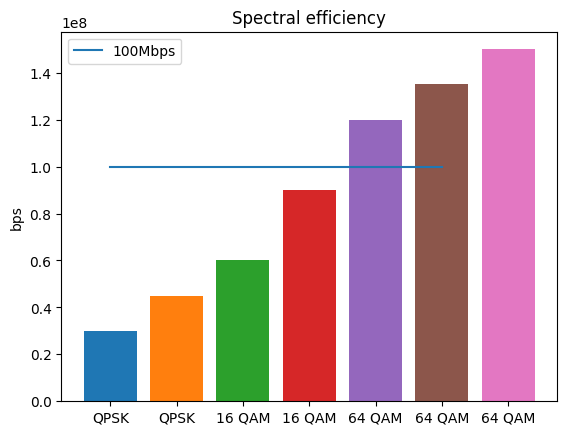

In [25]:
#-------------EFFICIENCY DIFFERENT MODULATION
QPSK2 = 1/2 * 2 * 30e6
QPSK3 = 3/4 * 2 * 30e6
QAM16_2 = 1/2 * 4 * 30e6
QAM16_3 = 3/4 * 4 * 30e6
QAM64_2 = 2/3 * 6 * 30e6
QAM64_3 = 3/4 * 6 * 30e6
QAM64_4 = 5/6 * 6 * 30e6
print(QAM64_2)

plt.ylabel('bps')
plt.bar(1, QPSK2)
plt.bar(2, QPSK3)
plt.bar(3, QAM16_2)
plt.bar(4, QAM16_3)
plt.bar(5, QAM64_2)
plt.bar(6, QAM64_3)
plt.bar(7, QAM64_4)
plt.plot(range(1, 7), [100e6 for x in range(1, 7)], label='100Mbps')
plt.xticks(range(1, 8), ["QPSK", "QPSK", "16 QAM", "16 QAM", "64 QAM", "64 QAM", "64 QAM"])
plt.title('Spectral efficiency')
plt.legend()

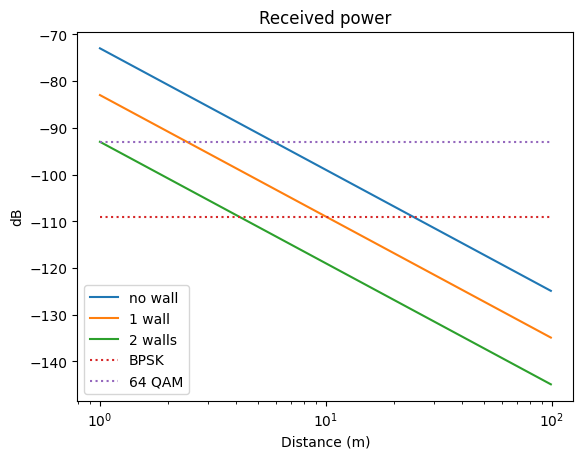

In [29]:
snr_received_list = []
snr_received_list_1 = []
snr_received_list_2 = []
snr_received_list_3 = []

distance = 100
for i in range(1, distance):
    #snr_received_list.append(todB(power_transmit / (noise * 10)) - path_loss2(i))
    snr_received_list.append(todB(power_transmit / (noise * 10 * path_loss(i))))
    snr_received_list_1.append(todB(power_transmit / (noise * path_loss(i) * 10 * 10)))
    snr_received_list_2.append(todB(power_transmit / (noise * path_loss(i) * 10 * 10**2)))
    snr_received_list_3.append(todB(power_transmit / (noise * path_loss(i) * 10 * 10**3)))



plt.plot(range(1, distance), snr_received_list, label='no wall')
plt.plot(range(1, distance), snr_received_list_1, label='1 wall')
plt.plot(range(1, distance), snr_received_list_2, label='2 walls')
#plt.plot(range(1, distance), snr_received_list_3, label)
plt.plot(range(1, distance), [-79-30 for x in range(1, distance)], linestyle='dotted', label='BPSK')
plt.plot(range(1, distance), [-93 for x in range(1, distance)], linestyle='dotted', label='64 QAM')
#plt.plot(range(1, 30), pwr_received_list)
plt.xscale('log')
plt.title("Received power")
plt.ylabel("dB")
plt.xlabel("Distance (m)")
plt.legend()

In [14]:
print(todB(power_transmit / (noise * 10 * path_loss(6))))

-93.23193250997474


In [19]:
np.sqrt(8**2 + 4**2)

8.94427190999916

In [26]:
2**6

64